In [18]:
import pandas as pd

df = pd.read_csv('CleanData.csv', encoding='utf-8')

In [17]:
df['condition'].value_counts()

condition
New                   331999
New with tags         106619
New with box           90288
Brand New              52805
New without tags       46148
                       ...  
Usato - Eccellente         2
Usato - Buono              2
New: Never Used            1
Sehr gut                   1
Bon                        1
Name: count, Length: 64, dtype: int64

In [7]:

df['bidCount'] = df['bidCount'].fillna('Not bid')
df['currentBidPrice'] = df['currentBidPrice'].fillna('Not bid')
df['itemEndDate'] = df['itemEndDate'].fillna('Not bid')

df['condition'] = df['condition'].fillna('Unknown')
df['listingMarketplaceId'] = df['listingMarketplaceId'].fillna('Unknown')
df['shippingCostType'] = df['shippingCostType'].fillna('Unknown')
df['category_1'] = df['category_1'].fillna('Unknown')
df['category_2'] = df['category_2'].fillna('Unknown')

df['discountRatio'] = df['discountRatio'].fillna(0)

In [8]:
# 컬럼, 결측치, 타입 등 요약
print(df.info())

# 컬럼별 고유값 개수 확인
print(df.nunique().sort_values(ascending=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801367 entries, 0 to 801366
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   availableCoupons          801367 non-null  bool   
 1   bidCount                  801367 non-null  object 
 2   buyingOptions             801367 non-null  object 
 3   categories                801367 non-null  object 
 4   condition                 801367 non-null  object 
 5   currentBidPrice           801367 non-null  object 
 6   itemCreationDate          801367 non-null  object 
 7   itemEndDate               801367 non-null  object 
 8   itemId                    801367 non-null  object 
 9   itemLocation              801367 non-null  object 
 10  itemOriginDate            801367 non-null  object 
 11  leafCategoryIds           801367 non-null  object 
 12  listingMarketplaceId      801367 non-null  object 
 13  price                     801367 non-null  f

📊 기본 통계 요약:
               price  discountRatio  feedbackScore  feedbackPercentage
count  801367.000000  801367.000000   8.013670e+05       801367.000000
mean       48.044848       6.116759   2.858712e+05           98.376329
std       175.700214      15.303953   9.155372e+05            6.743939
min         0.720000    -186.000000  -1.600000e+01            0.000000
25%        11.450000       0.000000   1.219000e+03           98.400000
50%        19.990000       0.000000   8.004000e+03           99.300000
75%        41.990000       0.000000   5.512000e+04           99.700000
max     45000.000000     100.000000   1.304524e+07          100.000000


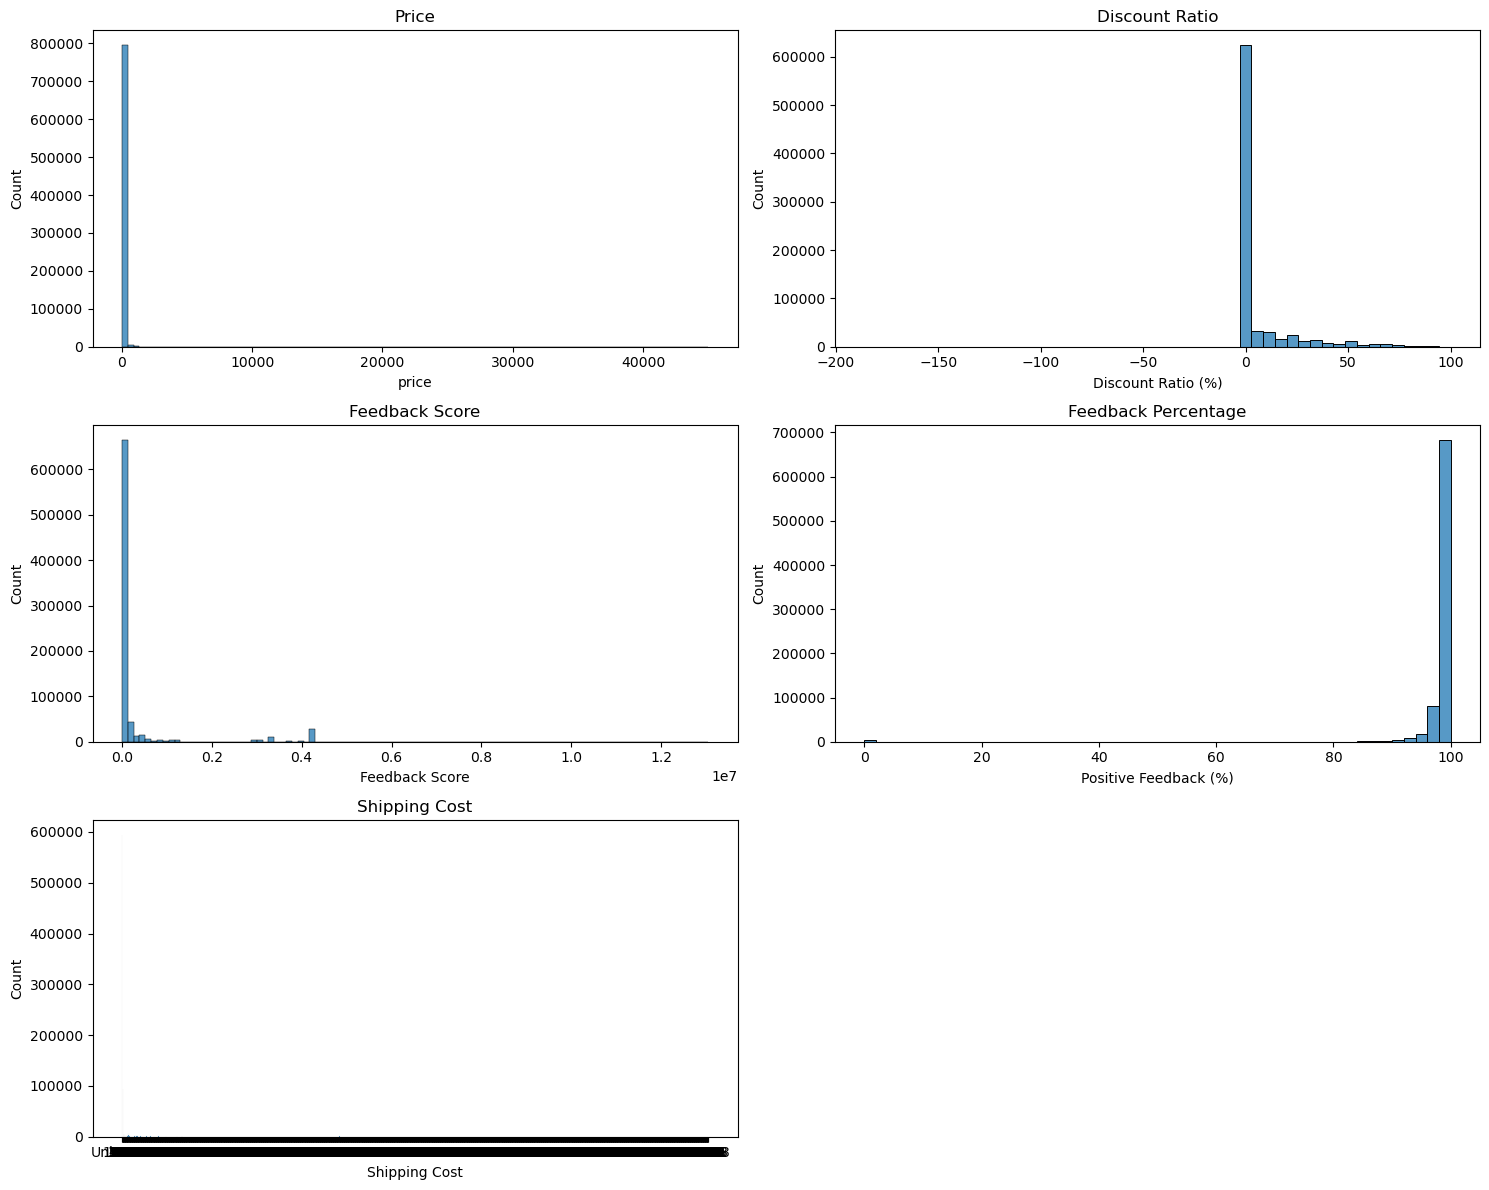

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수 목록
numeric_cols = ['price', 'discountRatio', 'feedbackScore', 'feedbackPercentage', 'shippingCost']

# 1. 기초 통계 요약
print("📊 기본 통계 요약:")
print(df[numeric_cols].describe())

# 2. 시각화
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# 1. price (log 변환)
price = df['price']
sns.histplot(price, bins=100, ax=axes[0])
axes[0].set_title('Price')
axes[0].set_xlabel('price')
axes[0].set_ylabel('Count')

# 2. discountRatio
sns.histplot(df['discountRatio'], bins=50, ax=axes[1])
axes[1].set_title('Discount Ratio')
axes[1].set_xlabel('Discount Ratio (%)')
axes[1].set_ylabel('Count')

# 3. feedbackScore
sns.histplot(df['feedbackScore'], bins=100, ax=axes[2])
axes[2].set_title('Feedback Score')
axes[2].set_xlabel('Feedback Score')
axes[2].set_ylabel('Count')

# 4. feedbackPercentage
sns.histplot(df['feedbackPercentage'], bins=50, ax=axes[3])
axes[3].set_title('Feedback Percentage')
axes[3].set_xlabel('Positive Feedback (%)')
axes[3].set_ylabel('Count')

# 5. shippingCost
sns.histplot(df['shippingCost'], bins=50, ax=axes[4])
axes[4].set_title('Shipping Cost')
axes[4].set_xlabel('Shipping Cost')
axes[4].set_ylabel('Count')

# 6번째 그래프는 비워둠
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()


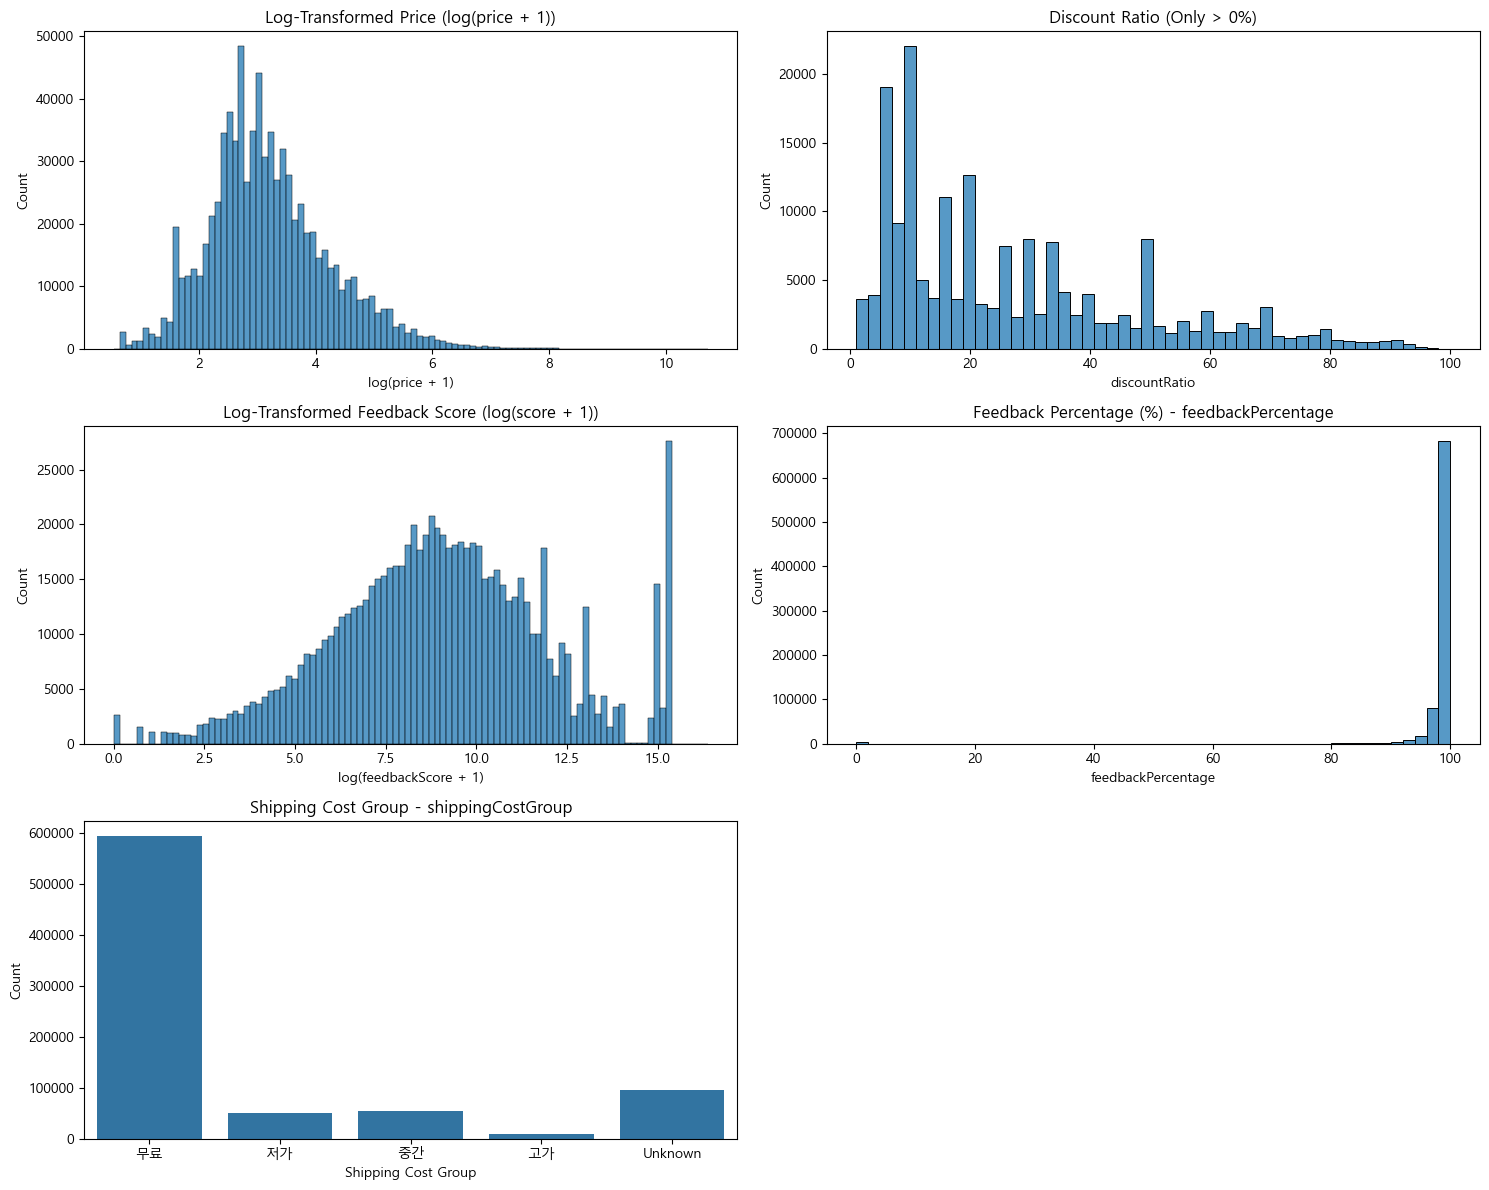

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 🔧 한글 폰트 설정 (Windows 기준: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 📌 수치형 컬럼 목록
numeric_cols = ['price', 'discountRatio', 'feedbackScore', 'feedbackPercentage', 'shippingCost']

# 1. shippingCost를 숫자형으로 변환
df['shippingCost'] = pd.to_numeric(df['shippingCost'], errors='coerce')

# 2. 배송비 구간화 함수
def shipping_cost_bin(x):
    if pd.isna(x):
        return 'Unknown'
    elif x == 0:
        return '무료'
    elif x <= 5:
        return '저가'
    elif x <= 15:
        return '중간'
    else:
        return '고가'

df['shippingCostGroup'] = df['shippingCost'].apply(shipping_cost_bin)

# 3. 시각화 준비
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# 1. price - 로그 변환
log_price = df['price'].apply(np.log1p)
sns.histplot(log_price, bins=100, ax=axes[0])
axes[0].set_title('Log-Transformed Price (log(price + 1))')
axes[0].set_xlabel('log(price + 1)')
axes[0].set_ylabel('Count')

# 2. discountRatio - 0% 초과만 시각화
sns.histplot(df[df['discountRatio'] > 0]['discountRatio'], bins=50, ax=axes[1])
axes[1].set_title('Discount Ratio (Only > 0%)')
axes[1].set_xlabel('discountRatio')
axes[1].set_ylabel('Count')

# 3. feedbackScore - 로그 변환
log_score = df['feedbackScore'].apply(np.log1p)
sns.histplot(log_score, bins=100, ax=axes[2])
axes[2].set_title('Log-Transformed Feedback Score (log(score + 1))')
axes[2].set_xlabel('log(feedbackScore + 1)')
axes[2].set_ylabel('Count')

# 4. feedbackPercentage - 그대로
sns.histplot(df['feedbackPercentage'], bins=50, ax=axes[3])
axes[3].set_title('Feedback Percentage (%) - feedbackPercentage')
axes[3].set_xlabel('feedbackPercentage')
axes[3].set_ylabel('Count')

# 5. shippingCost - 구간화 후 시각화
sns.countplot(x='shippingCostGroup', data=df,
              order=['무료', '저가', '중간', '고가', 'Unknown'],
              ax=axes[4])
axes[4].set_title('Shipping Cost Group - shippingCostGroup')
axes[4].set_xlabel('Shipping Cost Group')
axes[4].set_ylabel('Count')

# 6번째 그래프 자리 제거
fig.delaxes(axes[5])

# 7. 전체 레이아웃 정리 후 출력
plt.tight_layout()
plt.show()


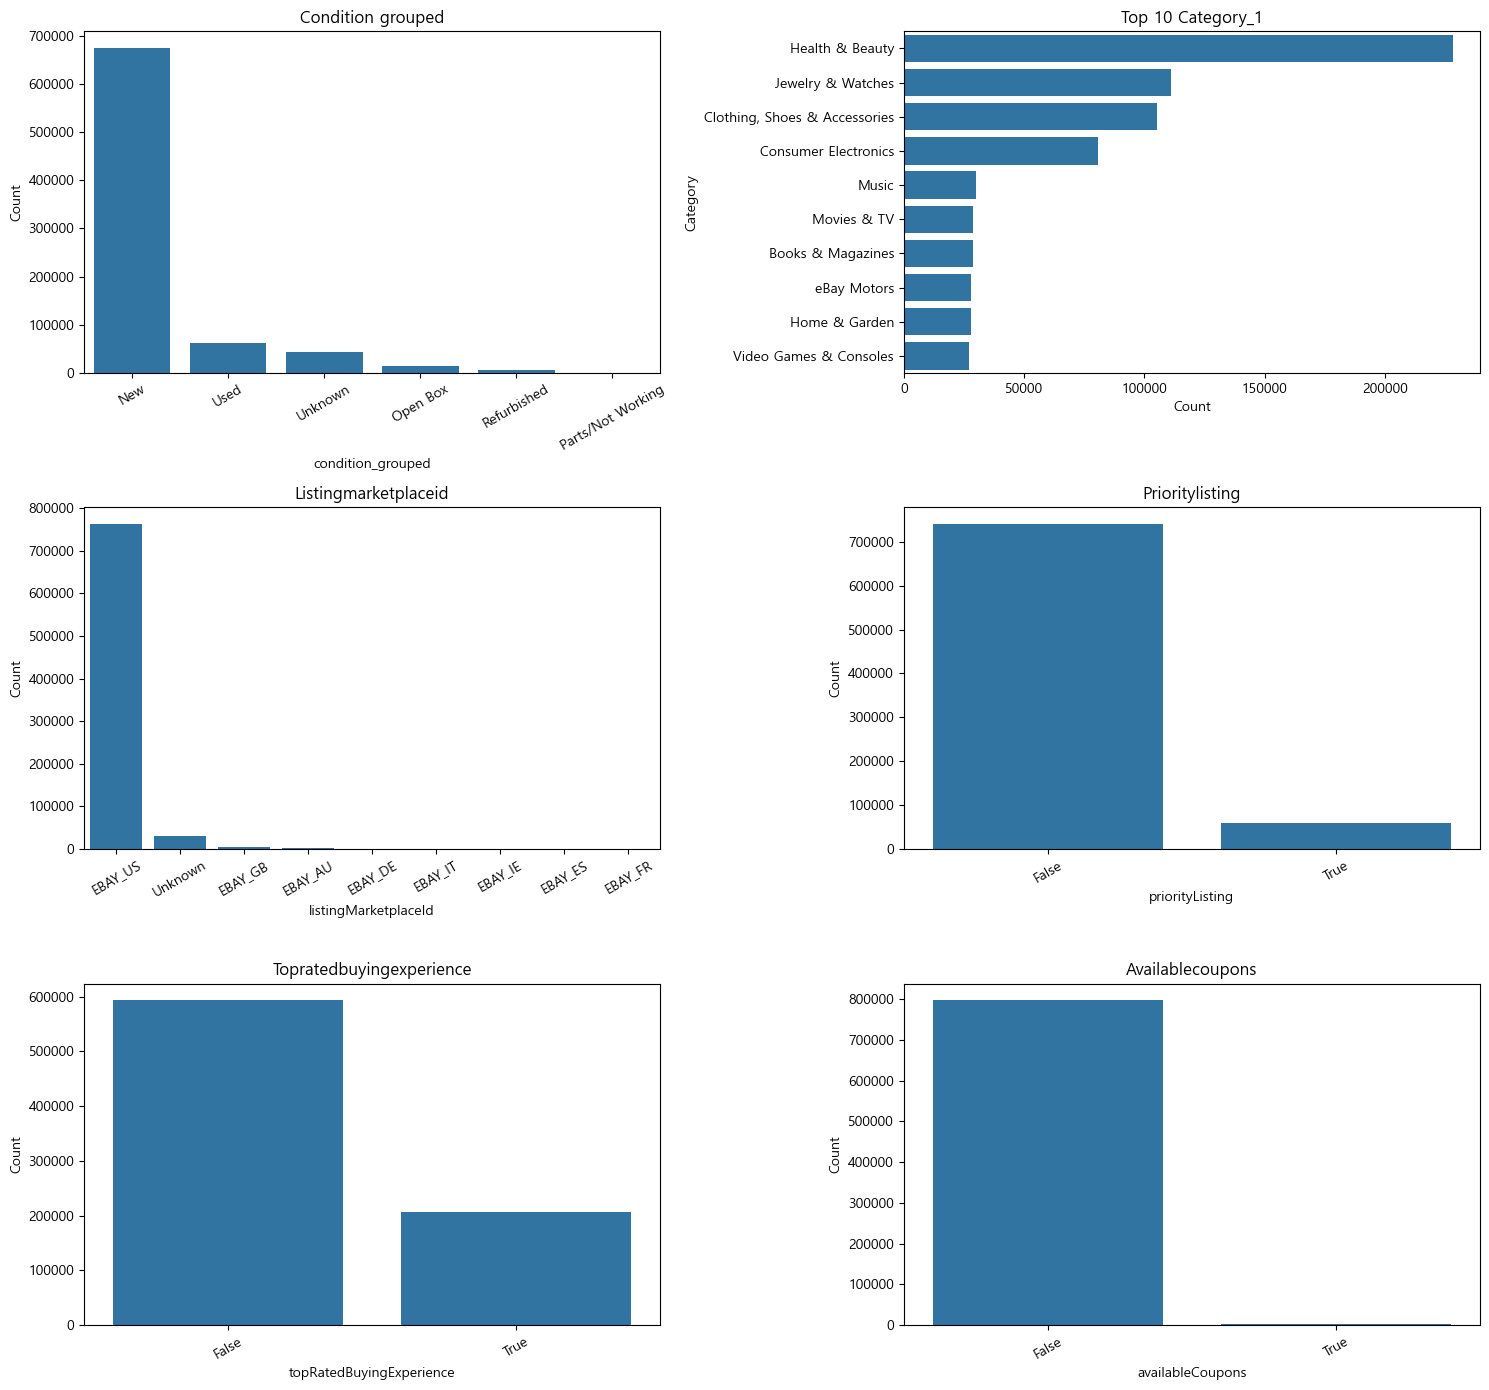

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# condition을 그룹화하는 함수 정의
def simplify_condition(val):
    val = str(val).lower()
    if 'new' in val or 'brand new' in val or 'neuf' in val or 'neu' in val:
        return 'New'
    elif 'used' in val or 'pre-owned' in val or 'gebraucht' in val or 'usato' in val:
        return 'Used'
    elif 'refurbished' in val:
        return 'Refurbished'
    elif 'open' in val or 'box' in val or 'other' in val:
        return 'Open Box'
    elif 'parts' in val or 'not working' in val or 'remanufactured' in val:
        return 'Parts/Not Working'
    else:
        return 'Unknown'

# apply로 새 컬럼 생성
df['condition_grouped'] = df['condition'].apply(simplify_condition)


# 시각화 대상 변수 (condition → condition_grouped 로 변경)
cat_cols = ['condition_grouped', 'category_1', 'listingMarketplaceId',
            'priorityListing', 'topRatedBuyingExperience', 'availableCoupons']

# 서브플롯 설정
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 14))
axes = axes.flatten()

# 반복문으로 그리기
for i, col in enumerate(cat_cols):
    ax = axes[i]
    
    # category_1은 Top 10만 시각화
    if col == 'category_1':
        top_categories = df[col].value_counts().head(10)
        sns.barplot(y=top_categories.index, x=top_categories.values, ax=ax)
        ax.set_title('Top 10 Category_1')
        ax.set_xlabel('Count')
        ax.set_ylabel('Category')
    else:
        sns.countplot(data=df, x=col, ax=ax, order=df[col].value_counts().index)
        ax.set_title(f'{col.replace("_", " ").capitalize()}')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=30)

# 빈 자리 제거
if len(cat_cols) < len(axes):
    for j in range(len(cat_cols), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [24]:
df['condition_grouped'].value_counts()

condition_grouped
New                  675378
Used                  61826
Unknown               43380
Open Box              14073
Refurbished            6203
Parts/Not Working       507
Name: count, dtype: int64

c:\Temp\ipykernel_12776\603629014.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['itemEndDate'] = pd.to_datetime(df['itemEndDate'], errors='coerce')


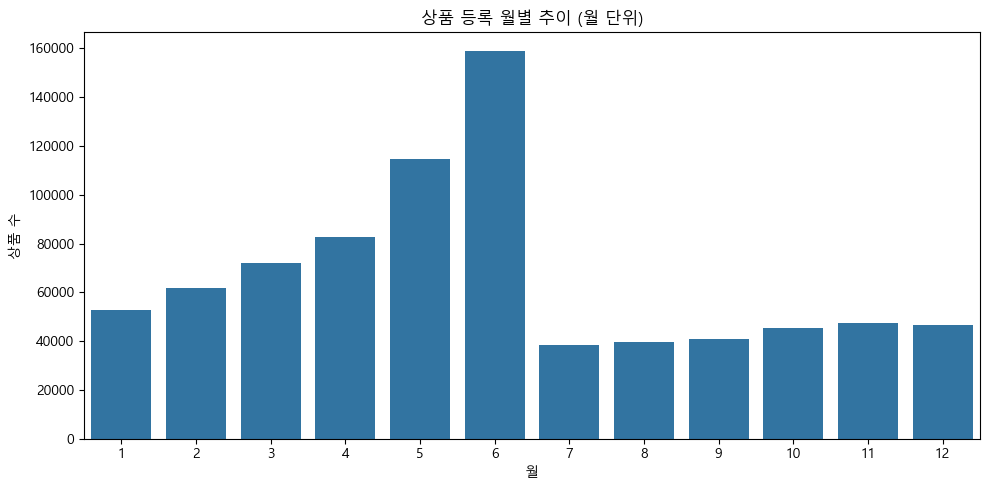

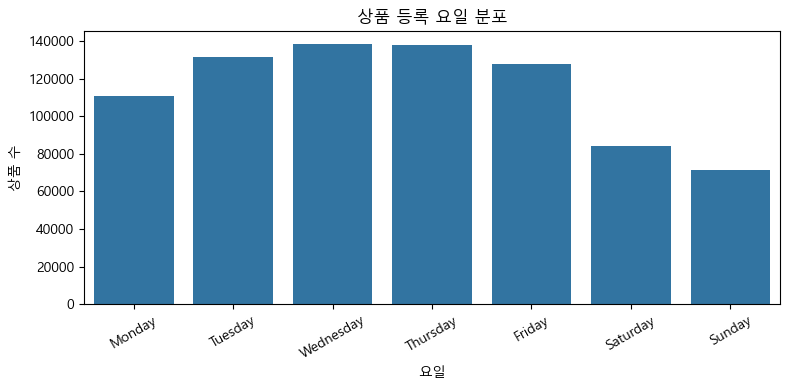

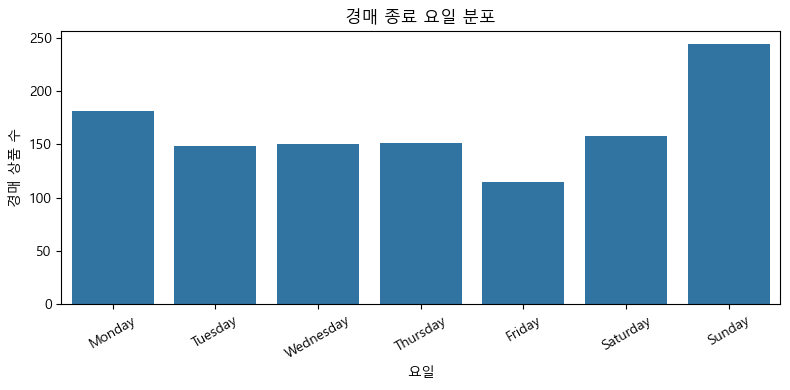

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 날짜형 컬럼 변환 (NaT 처리 포함)
df['itemCreationDate'] = pd.to_datetime(df['itemCreationDate'], errors='coerce')
df['itemOriginDate'] = pd.to_datetime(df['itemOriginDate'], errors='coerce')
df['itemEndDate'] = pd.to_datetime(df['itemEndDate'], errors='coerce')

# 📌 월 단위로만 보기 (1~12월)
df['creationMonth'] = df['itemCreationDate'].dt.month
month_order = list(range(1, 13))

plt.figure(figsize=(10, 5))
sns.countplot(x='creationMonth', data=df, order=month_order)
plt.title('상품 등록 월별 추이 (월 단위)')
plt.xlabel('월')
plt.ylabel('상품 수')
plt.tight_layout()
plt.show()

# 📌 요일별 등록 수
df['creationWeekday'] = df['itemCreationDate'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(8, 4))
sns.countplot(x='creationWeekday', data=df, order=weekday_order)
plt.title('상품 등록 요일 분포')
plt.xlabel('요일')
plt.ylabel('상품 수')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 📌 경매 종료 요일 (itemEndDate가 있는 데이터만 사용)
df_auction = df[df['itemEndDate'].notna()].copy()
df_auction['endWeekday'] = df_auction['itemEndDate'].dt.day_name()

plt.figure(figsize=(8, 4))
sns.countplot(x='endWeekday', data=df_auction, order=weekday_order)
plt.title('경매 종료 요일 분포')
plt.xlabel('요일')
plt.ylabel('경매 상품 수')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


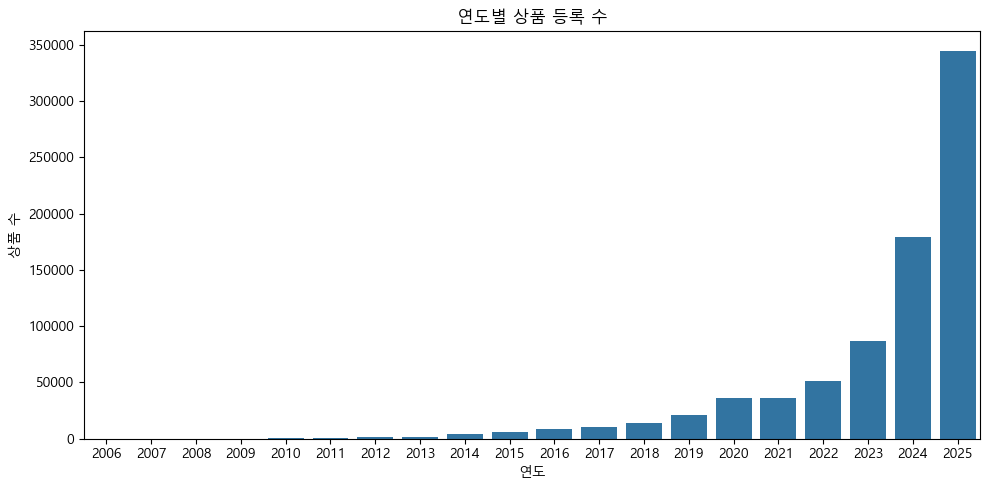

In [13]:
# 연도 추출
df['creationYear'] = df['itemCreationDate'].dt.year

# 연도별 상품 수 시각화
plt.figure(figsize=(10, 5))
sns.countplot(x='creationYear', data=df, order=sorted(df['creationYear'].dropna().unique()))
plt.title('연도별 상품 등록 수')
plt.xlabel('연도')
plt.ylabel('상품 수')
plt.tight_layout()
plt.show()


c:\Temp\ipykernel_12776\5240075.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['creationYearMonth'] = df['itemCreationDate'].dt.to_period('M').astype(str)


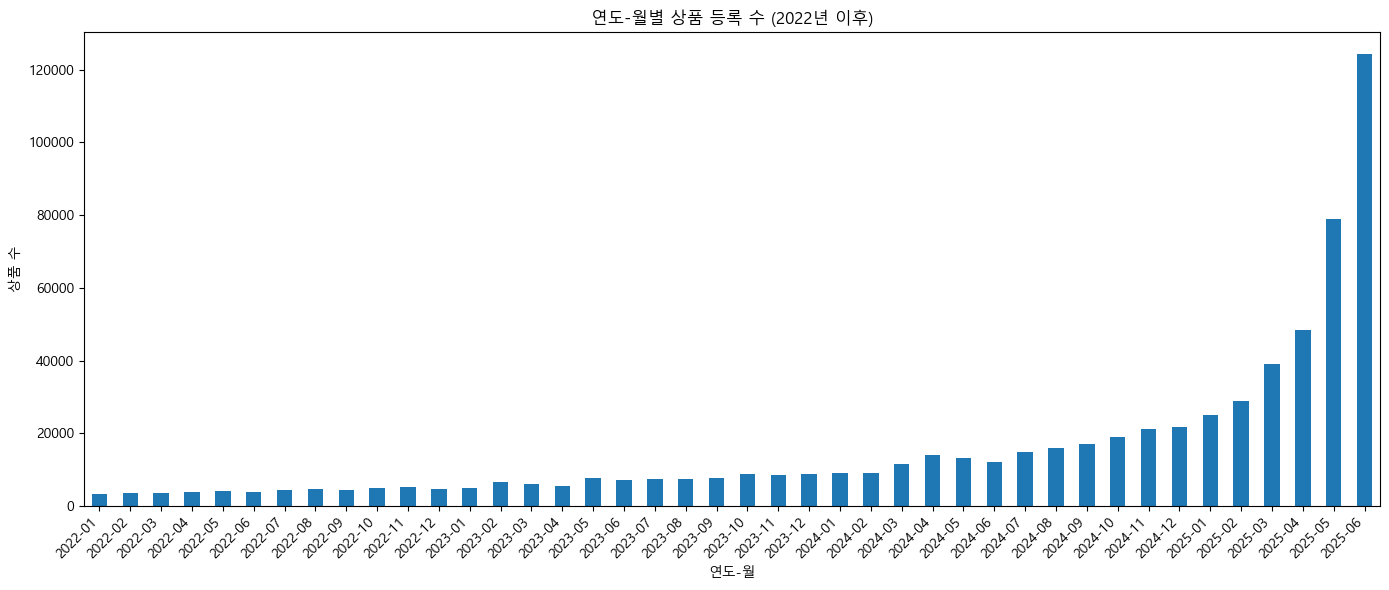

In [14]:
# 연-월 컬럼 생성
df['creationYearMonth'] = df['itemCreationDate'].dt.to_period('M').astype(str)

# 2022년 이후만 필터링
df_filtered = df[df['itemCreationDate'] >= '2022-01-01']

# 연-월별 상품 수 집계
ym_counts = df_filtered['creationYearMonth'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(14, 6))
ym_counts.plot(kind='bar')
plt.title('연도-월별 상품 등록 수 (2022년 이후)')
plt.xlabel('연도-월')
plt.ylabel('상품 수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [26]:
def simplify_condition(val):
    val = str(val).lower()
    
    # New 그룹
    if (
        'new' in val or 'brand new' in val or 'neuf' in val or 'neu' in val or 
        'factory sealed' in val or 'never used' in val or 'opened – never used' in val
    ):
        return 'New'
    
    # Used 그룹
    elif (
        'used' in val or 'pre-owned' in val or 'gebraucht' in val or 'usato' in val or 
        'good' in val or 'very good' in val or 'acceptable' in val
    ):
        return 'Used'
    
    # Refurbished 그룹
    elif 'refurbished' in val:
        return 'Refurbished'
    
    # Open Box 그룹
    elif (
        'open box' in val or 'new: other' in val or 'new without tags' in val or 
        'new without box' in val or 'new other' in val
    ):
        return 'Open Box'
    
    # Parts or Not Working 그룹
    elif 'parts' in val or 'not working' in val or 'remanufactured' in val:
        return 'Parts/Not Working'
    
    else:
        return 'Unknown'


# apply로 새 컬럼 생성
df['condition_group2'] = df['condition'].apply(simplify_condition)

df.to_csv('test.csv', index = False)

In [27]:
dd = pd.read_csv('test.csv')

dd['condition_grouped'].value_counts()

condition_grouped
New                  675378
Used                  61826
Unknown               43380
Open Box              14073
Refurbished            6203
Parts/Not Working       507
Name: count, dtype: int64